In [66]:
import pandas as pd
import plotnine as pn

In [67]:
df_at_least_six_or_at_most_two = pd.read_csv("/Users/nathanielimel/uci/projects/qal/quantifer-automata-learning/outputs/quantifier=at_least_six_or_at_most_two/num_states=7/epochs=10000.0/batch_size=3/lr=0.0001/losses.csv")

In [68]:
df_at_least_four = pd.read_csv("/Users/nathanielimel/uci/projects/qal/quantifer-automata-learning/outputs/quantifier=at_least_four/num_states=5/epochs=4000/batch_size=3/lr=0.0001/losses.csv")

In [69]:
# df = pd.read_csv("/Users/nathanielimel/uci/projects/qal/quantifer-automata-learning/outputs/quantifier=every/num_states=2/epochs=10000.0/batch_size=3/lr=0.001/losses.csv")
# df = pd.read_csv("/Users/nathanielimel/uci/projects/qal/quantifer-automata-learning/outputs/quantifier=at_least_three/num_states=4/epochs=10000.0/batch_size=3/lr=0.001/losses.csv")
# df = pd.read_csv("/Users/nathanielimel/uci/projects/qal/quantifer-automata-learning/outputs/quantifier=at_least_four/num_states=7/epochs=1000/batch_size=8/lr=0.001/losses.csv")
# df = pd.read_csv("/Users/nathanielimel/uci/projects/qal/quantifer-automata-learning/outputs/quantifier=at_least_six_or_at_most_two/num_states=7/epochs=1000/batch_size=8/lr=0.001/losses.csv")
# df = pd.read_csv("/Users/nathanielimel/uci/projects/qal/quantifer-automata-learning/outputs/quantifier=every/num_states=2/epochs=10000.0/batch_size=3/lr=0.0001/losses.csv")
df

,train_losses,train_accuracies,test_losses,test_accuracies,epoch,quantifier
0,0.693152,0.517691,0.693195,0.458874,1,at_least_four
1,0.693132,0.517691,0.693252,0.458874,2,at_least_four
2,0.693109,0.517691,0.693282,0.458874,3,at_least_four
3,0.693092,0.517691,0.693320,0.458874,4,at_least_four
4,0.693084,0.517691,0.693353,0.458874,5,at_least_four
...,...,...,...,...,...,...
4217,0.005603,0.997955,0.033337,0.995261,4218,at_least_six_or_at_most_two
4218,0.005598,0.997955,0.033371,0.995261,4219,at_least_six_or_at_most_two
4219,0.005593,0.997955,0.033398,0.995261,4220,at_least_six_or_at_most_two
4220,0.005587,0.997955,0.033438,0.995261,4221,at_least_six_or_at_most_two


In [70]:
# one 'loss' df
df_curves = pd.DataFrame(
    zip(
        pd.concat([df["train_losses"], df["test_losses"]]),
        pd.concat([df["train_accuracies"], df["test_accuracies"]]),
        ["train"] * len(df) + ["test"] * len(df),
        pd.concat([df["epoch"], df["epoch"]])
    ),
    columns=["loss", "accuracy", "set", "epoch"],
    )
df_curves

,loss,accuracy,set,epoch
0,0.693152,0.517691,train,1
1,0.693132,0.517691,train,2
2,0.693109,0.517691,train,3
3,0.693092,0.517691,train,4
4,0.693084,0.517691,train,5
...,...,...,...,...
13361,0.033337,0.995261,test,4218
13362,0.033371,0.995261,test,4219
13363,0.033398,0.995261,test,4220
13364,0.033438,0.995261,test,4221


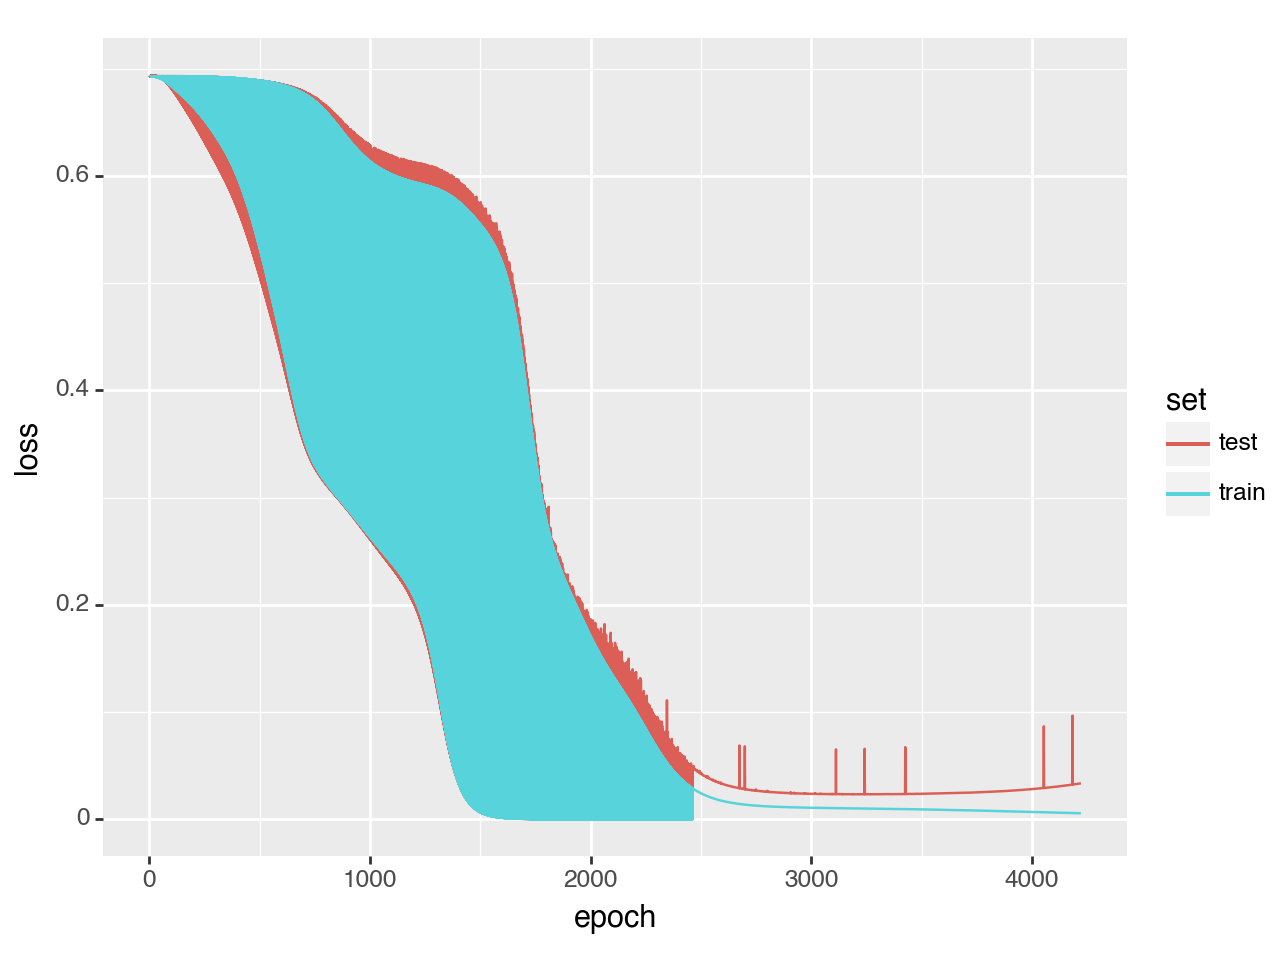

<Figure Size: (640 x 480)>

In [71]:
(
    pn.ggplot(df_curves, pn.aes(x="epoch", y="loss"))
    + pn.geom_line(mapping=pn.aes(color="set"))
)

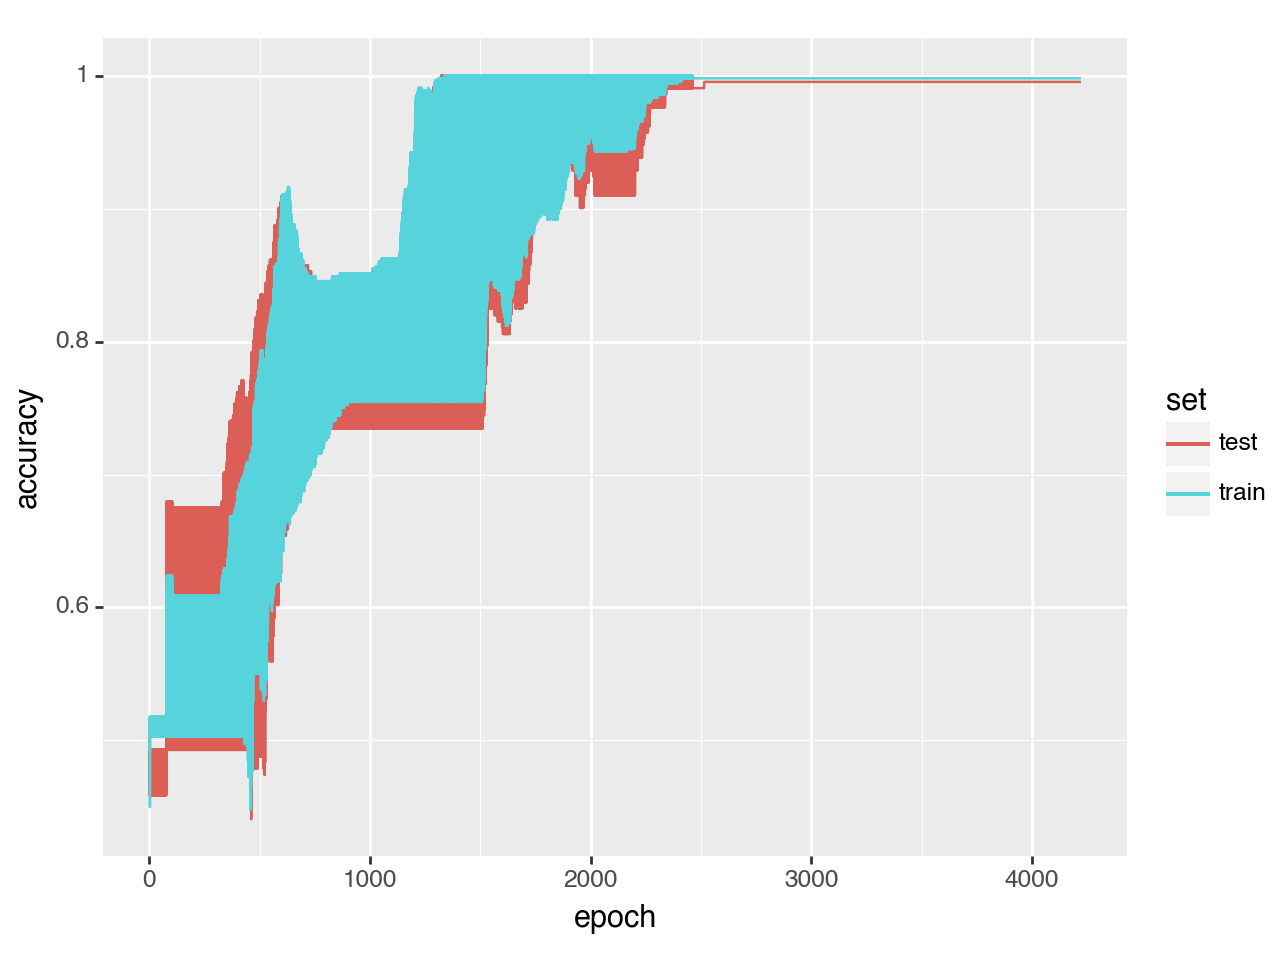

<Figure Size: (640 x 480)>

In [72]:
(
    pn.ggplot(df_curves, pn.aes(x="epoch", y="accuracy"))
    + pn.geom_line(mapping=pn.aes(color="set"))
)

In [73]:
# combine the interesting dfs
df_at_least_six_or_at_most_two["quantifier"] = "at_least_6_or_at_most_2"
df_at_least_four["quantifier"] = "at_least_4"

df = pd.concat([df_at_least_four, df_at_least_six_or_at_most_two])
df

,train_losses,train_accuracies,test_losses,test_accuracies,epoch,quantifier
0,0.693152,0.517691,0.693195,0.458874,1,at_least_4
1,0.693132,0.517691,0.693252,0.458874,2,at_least_4
2,0.693109,0.517691,0.693282,0.458874,3,at_least_4
3,0.693092,0.517691,0.693320,0.458874,4,at_least_4
4,0.693084,0.517691,0.693353,0.458874,5,at_least_4
...,...,...,...,...,...,...
4217,0.005603,0.997955,0.033337,0.995261,4218,at_least_6_or_at_most_2
4218,0.005598,0.997955,0.033371,0.995261,4219,at_least_6_or_at_most_2
4219,0.005593,0.997955,0.033398,0.995261,4220,at_least_6_or_at_most_2
4220,0.005587,0.997955,0.033438,0.995261,4221,at_least_6_or_at_most_2


In [77]:
def get_curves_df(data):
    # one 'curves' df
    df_curves = pd.DataFrame(
        zip(
            pd.concat([data["train_losses"], data["test_losses"]]),
            pd.concat([data["train_accuracies"], data["test_accuracies"]]),
            ["train"] * len(data) + ["test"] * len(data),
            pd.concat([data["epoch"], data["epoch"]]),
            pd.concat([data["quantifier"], data["quantifier"]]),
        ),
        columns=["loss", "accuracy", "set", "epoch", "quantifier"],
        )
    return df_curves


df_curves = pd.concat([get_curves_df(df_at_least_four), get_curves_df(df_at_least_six_or_at_most_two)])
df_curves

,loss,accuracy,set,epoch,quantifier
0,0.693152,0.517691,train,1,at_least_4
1,0.693132,0.517691,train,2,at_least_4
2,0.693109,0.517691,train,3,at_least_4
3,0.693092,0.517691,train,4,at_least_4
4,0.693084,0.517691,train,5,at_least_4
...,...,...,...,...,...
8439,0.033337,0.995261,test,4218,at_least_6_or_at_most_2
8440,0.033371,0.995261,test,4219,at_least_6_or_at_most_2
8441,0.033398,0.995261,test,4220,at_least_6_or_at_most_2
8442,0.033438,0.995261,test,4221,at_least_6_or_at_most_2


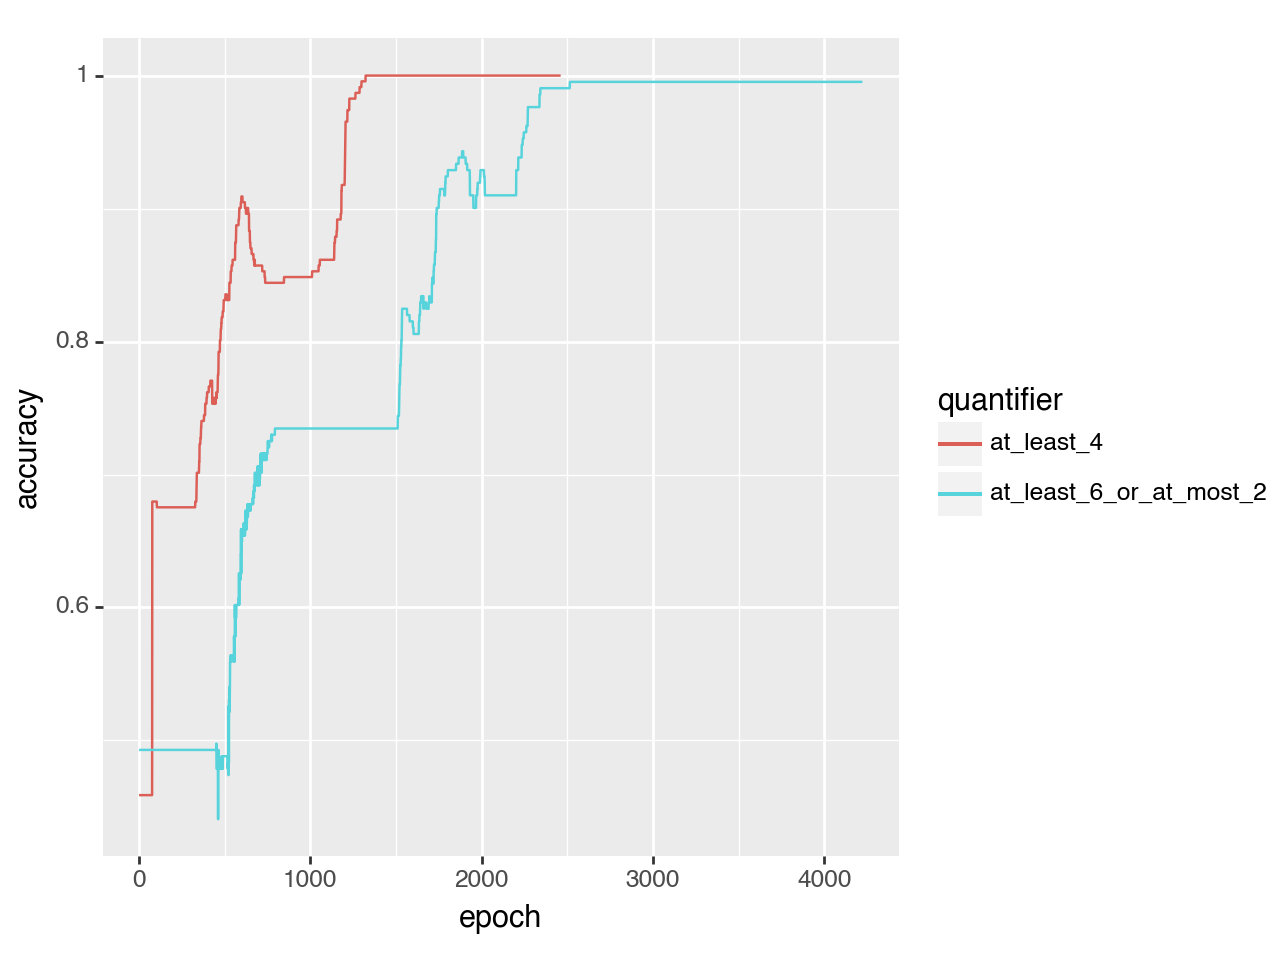

<Figure Size: (640 x 480)>

In [80]:
(
    pn.ggplot(df_curves[df_curves["set"] == "test"], pn.aes(x="epoch", y="accuracy"))
    + pn.geom_line(mapping=pn.aes(color="quantifier"))
)

In [ ]:
(
    pn.ggplot(df_curves[df_curves["set"] == "test"], pn.aes(x="epoch", y="loss"))
    + pn.geom_line(mapping=pn.aes(color="quantifier"))
)

In [74]:
import torch
from qal.pfa import PFAModel

ModuleNotFoundError: No module named 'qal'

In [ ]:
model = PFAModel(2, [0,1])
model.load_state_dict(torch.load(PATH))
model.eval()